<a href="https://colab.research.google.com/github/Akshaya345/AIML_Tutorial/blob/main/AIML_Module4_Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

In [9]:
x=2*np.random.rand(100,1)
y=4+3*x+np.random.randn(100,1)

Text(0, 0.5, 'y')

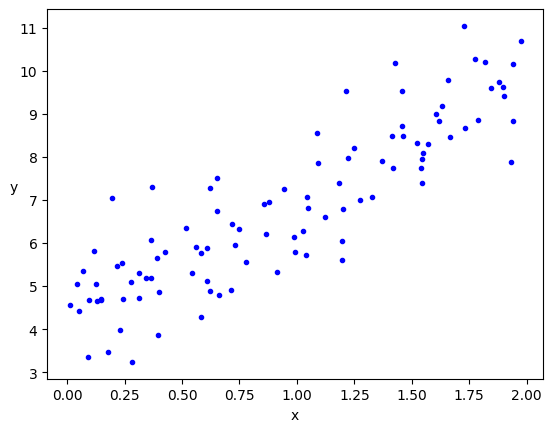

In [10]:
plt.plot(x,y,'b.')
plt.xlabel('x')
plt.ylabel('y',rotation=0)

In [11]:
def cal_cost(y_pred,x,y):
    '''
    Calculates the cost for given X and Y.
    y_pred = Vector of y_preds
    X = Row of X's np.zeros((2, j))
    y = Actual y's np.zeros((2, 1))

    where:
        j is the no of features
    '''
    m=len(y)
    predictions=x.dot(y_pred)
    cost=(1/2*m)*np.sum(np.square(predictions-y))
    return cost

In [12]:
def gradient_descent(x, y, y_pred, learning_rate=0.01, iterations=100):
    '''
    X = Matrix of X with added bias units
    y = Vector of Y
    y_pred = Vector of y_preds np.random.randn(j, 1)
    learning_rate
    iterations = no of iterations

    Returns the final y_pred vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)
    y_pred_history = np.zeros((iterations, 2))

    for it in range(iterations):
        prediction = np.dot(x, y_pred)
        y_pred = y_pred - (1 / m) * learning_rate * (x.T.dot((prediction - y)))
        y_pred_history[it,:] = y_pred.T
        cost_history[it]  = cal_cost(y_pred, x, y)

    return y_pred, cost_history, y_pred_history

In [13]:
lr = 0.01
n_iter = 1000

y_pred = np.random.randn(2,1)
X_b = np.c_[np.ones((len(x), 1)), x]
y_pred, cost_history, y_pred_history = gradient_descent(X_b, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 3.903
y_pred[1]: 3.046
Final error: 4180.375


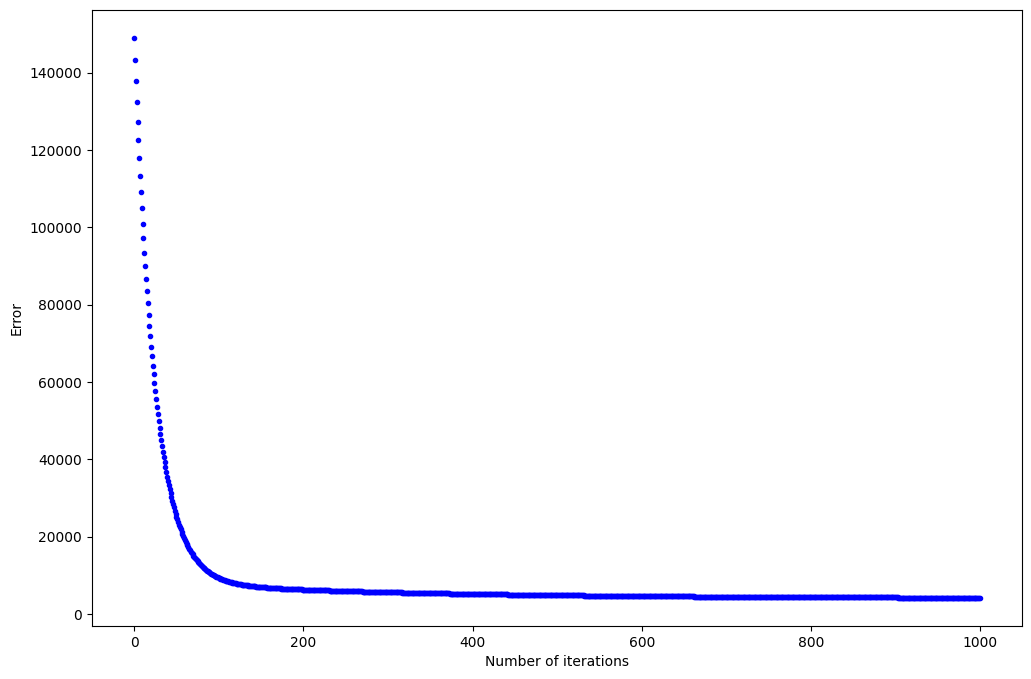

In [14]:
fig,ax=plt.subplots(figsize=(12,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')

ax.plot(range(n_iter), cost_history, 'b.')

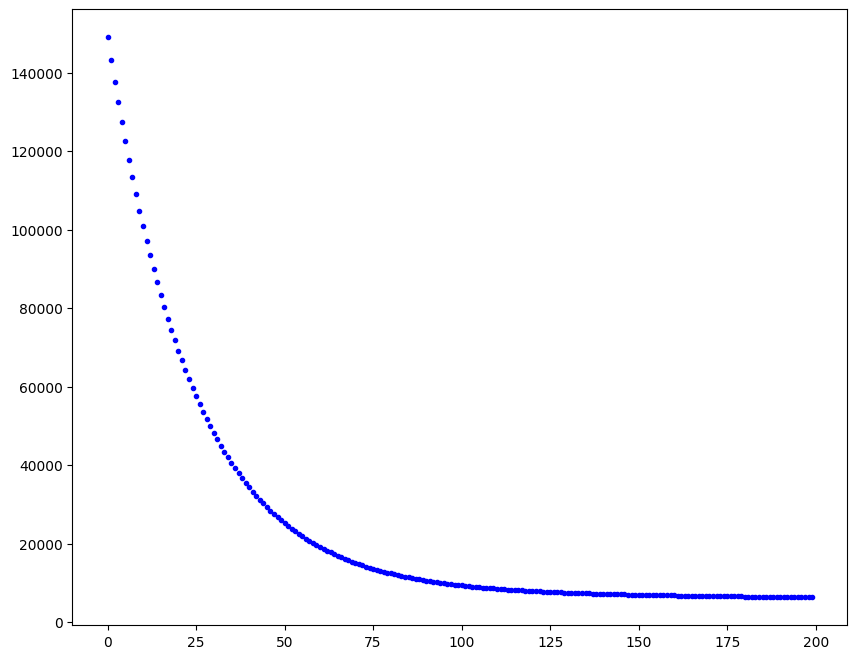

In [15]:
fig,ax = plt.subplots(figsize=(10,8))
ax.plot(range(200), cost_history[:200], 'b.')

In [16]:
def stocashtic_gradient_descent(x, y, y_pred, learning_rate=0.01, iterations=10):
    '''
    X = Matrix of X with added bias units
    y = Vector of Y
    y_pred = Vector of y_pred np.random.randn(j,1)
    learning_rate
    iterations = no of iterations

    Returns the final y_pred vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)

    for it in range(iterations):
        cost = 0.0

        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = x[rand_ind, :].reshape(1, x.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate *(X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost

    return y_pred, cost_history

In [17]:
lr = 0.5
n_iter = 50
y_pred = np.random.randn(2, 1)
X_b = np.c_[np.ones((len(x), 1)), x]
y_pred, cost_history = stocashtic_gradient_descent(X_b, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 4.121
y_pred[1]: 2.755
Final error: 41.313


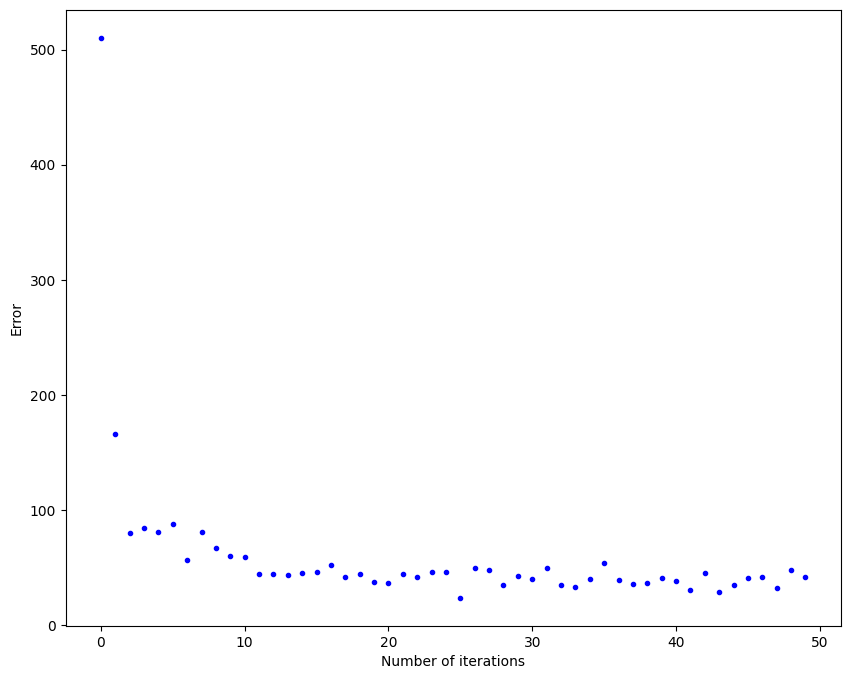

In [18]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
y_pred = np.random.randn(2,1)

ax.plot(range(n_iter), cost_history, 'b.')

In [19]:
def minibatch_gradient_descent(x, y, y_pred, learning_rate=0.01, iterations=10, batch_size=20):
    '''
    X = Matrix of X without added bias units
    y = Vector of Y
    y_pred = Vector of y_preds np.random.randn(j, 1)
    learning_rate
    iterations = no of iterations

    Returns the final theta vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m / batch_size)

    for it in range(iterations):
        cost = 0.0
        indices = np.random.permutation(m)
        x = x[indices]
        y = y[indices]

        for i in range(0, m, batch_size):
            X_i = x[i: i + batch_size]
            y_i = y[i: i + batch_size]

            X_i = np.c_[np.ones(len(X_i)), X_i]
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate * (X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost

    return y_pred, cost_history

In [20]:
lr = 0.1
n_iter = 200
y_pred = np.random.randn(2,1)
y_pred, cost_history = minibatch_gradient_descent(x, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 4.148
y_pred[1]: 2.827
Final error: 807.488


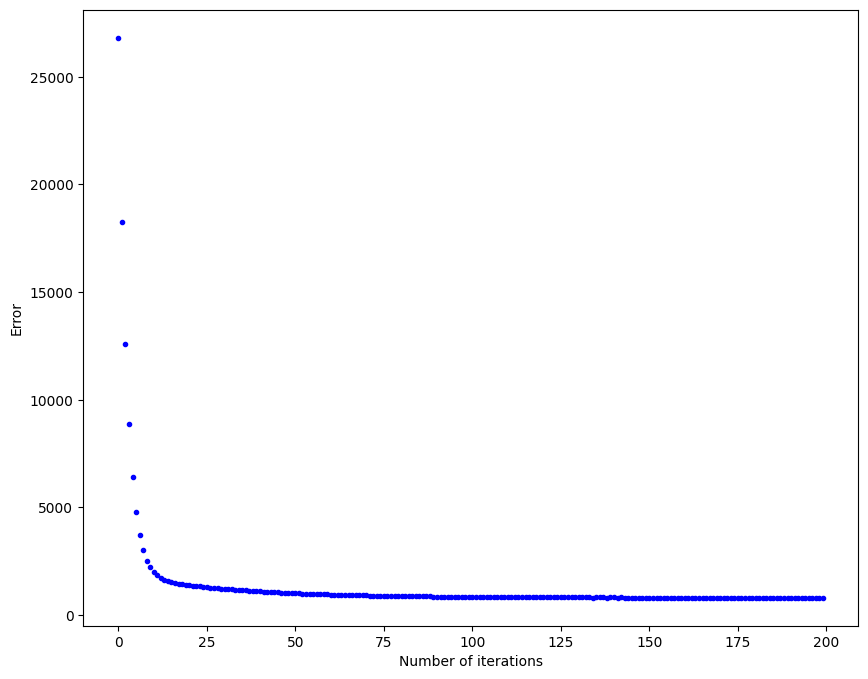

In [21]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
y_pred = np.random.randn(2,1)

ax.plot(range(n_iter), cost_history, 'b.')

In [22]:
#1.Change batch size in mini-batch gradient descent.
def minibatch_gradient_descent(x, y, y_pred, learning_rate=0.01, iterations=10, batch_size=30):
    '''
    X = Matrix of X without added bias units
    y = Vector of Y
    y_pred = Vector of y_preds np.random.randn(j, 1)
    learning_rate
    iterations = no of iterations

    Returns the final theta vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m / batch_size)

    for it in range(iterations):
        cost = 0.0
        indices = np.random.permutation(m)
        x = x[indices]
        y = y[indices]

        for i in range(0, m, batch_size):
            X_i = x[i: i + batch_size]
            y_i = y[i: i + batch_size]

            X_i = np.c_[np.ones(len(X_i)), X_i]
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate * (X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost

    return y_pred, cost_history

In [23]:
lr = 0.1
n_iter = 200
y_pred = np.random.randn(2,1)
y_pred, cost_history = minibatch_gradient_descent(x, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 4.248
y_pred[1]: 2.741
Final error: 1135.678


In [24]:
#1.Change batch size in mini-batch gradient descent.
def minibatch_gradient_descent(x, y, y_pred, learning_rate=0.01, iterations=10, batch_size=10):
    '''
    X = Matrix of X without added bias units
    y = Vector of Y
    y_pred = Vector of y_preds np.random.randn(j, 1)
    learning_rate
    iterations = no of iterations

    Returns the final theta vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m / batch_size)

    for it in range(iterations):
        cost = 0.0
        indices = np.random.permutation(m)
        x = x[indices]
        y = y[indices]

        for i in range(0, m, batch_size):
            X_i = x[i: i + batch_size]
            y_i = y[i: i + batch_size]

            X_i = np.c_[np.ones(len(X_i)), X_i]
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate * (X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost

    return y_pred, cost_history

In [25]:
lr = 0.1
n_iter = 200
y_pred = np.random.randn(2,1)
y_pred, cost_history = minibatch_gradient_descent(x, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 4.187
y_pred[1]: 2.797
Final error: 402.949


In [41]:
#2 Test all the three out on real datasets.
import numpy as np
import tensorflow as tf
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = datasets.load_iris()
X, y = iris.data, (iris.target == 2).astype(int)  # Binary classification (Iris-Virginica or not)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Evaluate the model on the test set
_, accuracy = model.evaluate(X_test, y_test)
print(f"Accuracy: {accuracy}")


Epoch 1/50
4/4 [==============================] - 0s 4ms/step - loss: 0.4491 - accuracy: 0.7833
Epoch 2/50
4/4 [==============================] - 0s 4ms/step - loss: 0.4470 - accuracy: 0.7833
Epoch 3/50
4/4 [==============================] - 0s 3ms/step - loss: 0.4449 - accuracy: 0.7833
Epoch 4/50
4/4 [==============================] - 0s 3ms/step - loss: 0.4429 - accuracy: 0.7917
Epoch 5/50
4/4 [==============================] - 0s 4ms/step - loss: 0.4410 - accuracy: 0.7917
Epoch 6/50
4/4 [==============================] - 0s 3ms/step - loss: 0.4390 - accuracy: 0.8000
Epoch 7/50
4/4 [==============================] - 0s 3ms/step - loss: 0.4372 - accuracy: 0.8000
Epoch 8/50
4/4 [==============================] - 0s 4ms/step - loss: 0.4353 - accuracy: 0.8000
Epoch 9/50
4/4 [==============================] - 0s 3ms/step - loss: 0.4336 - accuracy: 0.8000
Epoch 10/50
4/4 [==============================] - 0s 4ms/step - loss: 0.4318 - accuracy: 0.8000
Epoch 11/50
4/4 [======================

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset from scikit-learn
iris = load_iris()

# Assuming 'sepal length (cm)' as the feature and 'petal length (cm)' as the target for illustration
X = iris.data[:, 0].reshape(-1, 1)
y = iris.data[:, 2].reshape(-1, 1)

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Add a bias term to the features
X_bias = np.c_[np.ones((X.shape[0], 1)), X]

# Initialize weights randomly
np.random.seed(42)  # for reproducibility
y_pred_initial = np.random.randn(X_bias.shape[1], 1)

# Use gradient descent
final_y_pred, cost_history, y_pred_history = gradient_descent(X_bias, y, y_pred_initial, learning_rate=0.01, iterations=100)

# Print the final weights
print("Final Weights:")
print(final_y_pred)

print("\nCost:")
print(cost_history)

print("\nHistory of y_pred during training:")
print(y_pred_history)

Final Weights:
[[2.56426391]
 [0.92174956]]

Cost:
[7.08736777 6.95372261 6.82273699 6.69435798 6.56853371 6.44521335
 6.32434706 6.20588601 6.08978234 5.97598913 5.8644604  5.75515109
 5.64801704 5.54301496 5.44010242 5.33923784 5.24038047 5.14349035
 5.04852835 4.95545609 4.86423598 4.77483114 4.68720545 4.60132352
 4.51715064 4.4346528  4.35379667 4.27454957 4.19687949 4.12075505
 4.04614548 3.97302064 3.90135099 3.83110756 3.76226198 3.69478642
 3.62865363 3.56383688 3.50030998 3.43804727 3.37702359 3.31721428
 3.25859517 3.20114258 3.1448333  3.08964458 3.03555411 2.98254004
 2.93058095 2.87965584 2.82974415 2.7808257  2.73288073 2.68588986
 2.63983411 2.59469486 2.55045389 2.50709332 2.46459562 2.42294362
 2.3821205  2.34210976 2.30289523 2.26446108 2.22679176 2.18987206
 2.15368706 2.11822215 2.08346298 2.04939553 2.01600601 1.98328095
 1.95120712 1.91977155 1.88896156 1.85876468 1.82916872 1.80016172
 1.77173196 1.74386795 1.71655844 1.68979238 1.66355897 1.6378476
 1.61264789 

In [43]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the Iris dataset from scikit-learn
iris = load_iris()

# Assuming 'sepal length (cm)' as the feature and 'petal length (cm)' as the target for illustration
X = iris.data[:, 0].reshape(-1, 1)
y = iris.data[:, 2].reshape(-1, 1)

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Add a bias term to the features
X_bias = np.c_[np.ones((X.shape[0], 1)), X]

# Initialize weights randomly
np.random.seed(42)  # for reproducibility
y_pred_initial = np.random.randn(X_bias.shape[1], 1)

# Stochastic Gradient Descent
learning_rate = 0.01
iterations = 100
m = len(y)
cost_history = np.zeros(iterations)

for iteration in range(iterations):
    for i in range(m):
        random_index = np.random.randint(0, m)
        xi = X_bias[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        y_pred = np.dot(xi, y_pred_initial)
        error = y_pred - yi

        # Update weights for this single data point
        y_pred_initial = y_pred_initial - learning_rate * xi.T.dot(error)

    # Compute the cost for this iteration
    y_preds = np.dot(X_bias, y_pred_initial)
    cost = np.sum((y_preds - y) ** 2) / (2 * m)
    cost_history[iteration] = cost

# Print the final weights
print("Final Weights:")
print(y_pred_initial)

print("\nCost:")
print(cost_history)

Final Weights:
[[3.71197165]
 [1.47479626]]

Cost:
[0.69937239 0.37678729 0.37966885 0.37430225 0.37163175 0.3735364
 0.37309464 0.37740296 0.37339386 0.37737798 0.37277841 0.37706943
 0.37322969 0.37496879 0.3717685  0.38875902 0.37188889 0.37385517
 0.37353565 0.37564543 0.37760869 0.37255793 0.3752435  0.372266
 0.38173553 0.37778895 0.37730344 0.37185136 0.37557582 0.37261733
 0.37205885 0.374443   0.37213246 0.37526275 0.37278641 0.37305067
 0.3722903  0.37569966 0.37359346 0.37587542 0.37393341 0.37930867
 0.37283529 0.37333119 0.37201878 0.37427842 0.37172237 0.38153141
 0.37317524 0.37783808 0.37649573 0.37660827 0.37153506 0.37183416
 0.37423224 0.3739728  0.37332542 0.37327542 0.37373103 0.3735439
 0.37440319 0.37884478 0.37573978 0.37294968 0.37409628 0.37439424
 0.37665666 0.37292965 0.37372254 0.37382032 0.37246448 0.37200756
 0.37887298 0.37725013 0.37182526 0.3763765  0.37272602 0.37771463
 0.37179166 0.3789887  0.37430324 0.3745791  0.37343332 0.37799926
 0.37285957 0.3

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def mini_batch_gradient_descent(X, y, theta, learning_rate=0.01, iterations=100, batch_size=32):
    m = len(y)
    cost_history = []
    y_pred_history = []

    for _ in range(iterations):
        indices = np.random.choice(m, batch_size, replace=False)
        X_batch = X[indices]
        y_batch = y[indices]

        # Compute predictions and error
        y_pred = X_batch.dot(theta)
        error = y_pred - y_batch

        # Update weights
        theta -= (learning_rate / batch_size) * X_batch.T.dot(error)

        # Compute and record the cost
        cost = np.mean(error**2)
        cost_history.append(cost)
        y_pred_history.append(y_pred)

    return theta, cost_history, y_pred_history

# Load the Iris dataset from scikit-learn
iris = load_iris()

# Assuming 'sepal length (cm)' as the feature and 'petal length (cm)' as the target for illustration
X = iris.data[:, 0].reshape(-1, 1)
y = iris.data[:, 2].reshape(-1, 1)

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Add a bias term to the features
X_bias = np.c_[np.ones((X.shape[0], 1)), X]

# Initialize weights randomly
np.random.seed(42)  # for reproducibility
y_pred_initial = np.random.randn(X_bias.shape[1], 1)

# Use mini-batch gradient descent
final_y_pred, cost_history, y_pred_history = mini_batch_gradient_descent(X_bias, y, y_pred_initial, learning_rate=0.01, iterations=100, batch_size=32)

# Print the final weights
print("Final Weights:")
print(final_y_pred)

print("\nCost History:")
print(cost_history)

print("\nHistory of y_pred during training:")
print(y_pred_history)

Final Weights:
[[2.57365247]
 [0.94658323]]

Cost History:
[13.230451273635964, 11.362860483731716, 15.803101450146531, 16.21400039278934, 13.185789408593728, 12.095160843670378, 12.387447973749824, 11.513211136505422, 14.366285858299754, 12.312375057059922, 12.292888591293789, 11.668025675324643, 8.875598260561762, 10.65828198768838, 10.824180209271315, 9.199721334406494, 9.7008017265412, 11.059742704243208, 8.90562913557947, 9.703961657584312, 9.810060292446902, 9.871507965765428, 11.174627269401467, 9.44372473405378, 8.749609102034032, 10.403203323456609, 12.051829409785183, 7.79963484820772, 7.636327956158741, 8.51439465926767, 8.299045647483549, 8.472772704578727, 8.378270107612023, 8.18252671571712, 6.0555371924261046, 5.878942146664403, 7.163481359991741, 6.530303881106292, 6.024958643968956, 7.1011609380773155, 7.037024670889199, 6.779214198882172, 5.6705357964516345, 7.141978792432951, 5.25342185405143, 7.4729128701671215, 6.230977116286184, 5.624452530750516, 6.26020561389356

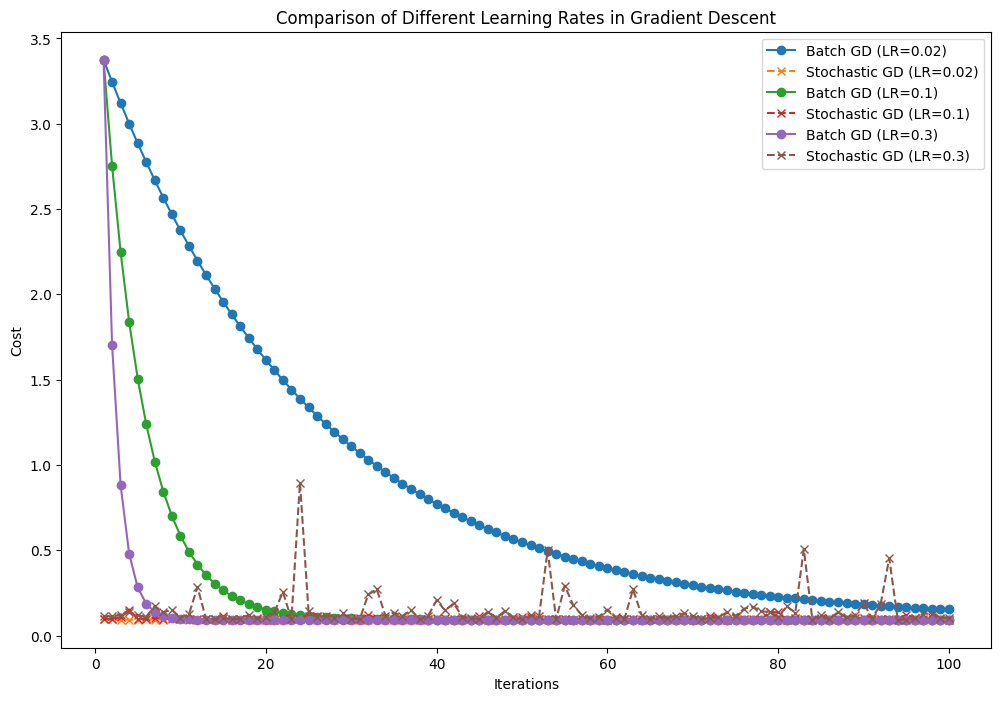

In [53]:
#3 Compare the effects of changing learning rate by the same amount in Batch GD, SGD and Mini-batch GD.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()
X = iris.data[:, 0:1]  # Selecting sepal length as a feature
y = iris.data[:, 1:2]  # Selecting sepal width as the target

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Add a bias term to the features
X_bias = np.c_[np.ones((X.shape[0], 1)), X]

# Initialize random weights
np.random.seed(42)
y_pred_initial = np.random.randn(X_bias.shape[1], 1)

# Number of iterations
iterations = 100

# Learning rates to compare (change these values)
learning_rates = [0.02, 0.1, 0.3]

# Define the gradient descent functions
def gradient_descent(X, y, theta, learning_rate, iterations):
    cost_history = []
    for _ in range(iterations):
        error = X @ theta - y
        gradient = X.T @ error / len(y)
        theta -= learning_rate * gradient
        cost = np.mean((error ** 2) / 2)
        cost_history.append(cost)
    return theta, cost_history

def stochastic_gradient_descent(X, y, theta, learning_rate, iterations):
    cost_history = []
    m = len(y)
    for _ in range(iterations):
        for i in range(m):
            random_index = np.random.randint(m)
            xi = X[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            error = xi @ theta - yi
            gradient = xi.T @ error
            theta -= learning_rate * gradient
        cost = np.mean((X @ theta - y) ** 2) / 2
        cost_history.append(cost)
    return theta, cost_history

# Plot settings
plt.figure(figsize=(12, 8))
plt.title('Comparison of Different Learning Rates in Gradient Descent')
plt.xlabel('Iterations')
plt.ylabel('Cost')

# Plot the results for each learning rate
for lr in learning_rates:
    # Batch Gradient Descent
    bgd_final_y_pred, bgd_cost_history = gradient_descent(X_bias, y, y_pred_initial.copy(), learning_rate=lr, iterations=iterations)

    # Stochastic Gradient Descent
    sgd_final_y_pred, sgd_cost_history = stochastic_gradient_descent(X_bias, y, y_pred_initial.copy(), learning_rate=lr, iterations=iterations)

    # Plot cost history for each method
    plt.plot(range(1, iterations + 1), bgd_cost_history, label=f'Batch GD (LR={lr})', linestyle='-', marker='o')
    plt.plot(range(1, iterations + 1), sgd_cost_history, label=f'Stochastic GD (LR={lr})', linestyle='--', marker='x')

# Show legend
plt.legend()
plt.show()

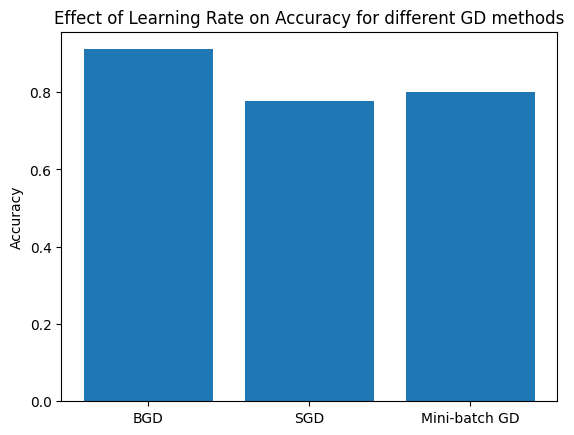

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Function to train a model and return the accuracy
def train_model(X_train, y_train, X_test, y_test, learning_rate, max_iter, batch_size=None):
    model = SGDClassifier(learning_rate='constant', eta0=learning_rate, max_iter=max_iter, random_state=42, warm_start=True)

    if batch_size is None:
        model.fit(X_train, y_train)
    else:
        num_batches = len(X_train) // batch_size
        for _ in range(num_batches):
            indices = np.random.choice(len(X_train), batch_size, replace=False)
            model.partial_fit(X_train[indices], y_train[indices], classes=np.unique(y))

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Experiment with different learning rates
learning_rate = 0.01
max_iter = 1000
batch_sizes = [None, 1, 30]  # None for BGD, 1 for SGD, and 30 for Mini-batch GD

results = {}

for batch_size in batch_sizes:
    accuracy = train_model(X_train, y_train, X_test, y_test, learning_rate, max_iter, batch_size)
    method = 'BGD' if batch_size is None else ('SGD' if batch_size == 1 else 'Mini-batch GD')
    results[f'{method}'] = accuracy

# Plot the results
plt.bar(results.keys(), results.values())
plt.ylabel('Accuracy')
plt.title('Effect of Learning Rate on Accuracy for different GD methods')
plt.show()
